# Bank Customer Churn Prediction
The aim of this project to analyze the bank customer's demographics and financial information which inculdes customer's age, gender. country, credit score, balance and many others to predict whether the customer will leave the bank or not.

### About the dataset
The dataset is taken from Kaggle. It contains 10000 rows and 14 columns. The objective of the dataset is to predict whether the customer will leave the bank or not, based on the customer's demographics and financial information included in the dataset.

The dataset has several factors that can influence the customer to leave the bank, which are termed as independent variables. The target variable is the customer's decision to leave the bank, which is termed as dependent variable.

### Data Dictionary
`RowNumber`	Row number

`CustomerId`	Unique identification key for different customers

`Surname`	Customer's last name

`CreditScore`	Credit score of the customer

`Geography`	Country of the customer

`Age`	Age of the customer

`Tenure`	Number of years for which the customer has been with the bank

`Balance Bank` balance of the customer

`NumOfProducts`	Number of bank products the customer is utilising

`HasCrCard`	Binary flag for whether the customer holds a credit card with the bank or not

`IsActiveMember`	Binary flag for whether the customer is an active member with the bank or not

`EstimatedSalary`	Estimated salary of the customer in Dollars

`Exited`	Binary flag 1 if the customer closed account with bank and 0 if the customer is retained


In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Wrangling/Cleaning

In [3]:
#checking the shape of the dataset
df.shape

(10000, 14)

In [4]:
#drop coulumns
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [5]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
#null values count
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#column data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
#dulicate values
df.duplicated().sum()

0

In [9]:
df.rename(columns={'Exited':'Churn'}, inplace=True)

In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

# Descriptive Statistics

In [11]:
#descriptive statistics
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA

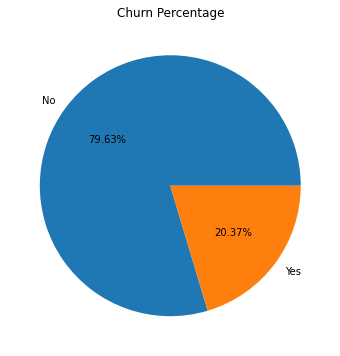

In [12]:
#pie chart with shurn percenatge 
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

The pie chart clearly visulaizes the customer churn in the dataset. The majority of the customers in the dataset continue to use the serivces of the bank with only `20.4%` of the customers churning.

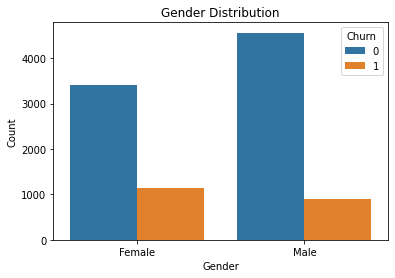

In [13]:
#gender and customer churn
sns.countplot(x = 'Gender', data = df, hue = 'Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

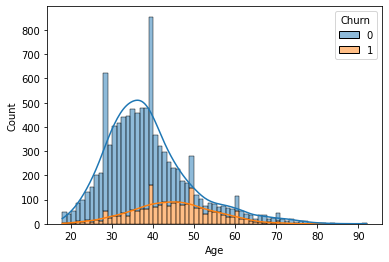

In [14]:
#histogram for age distribution
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack",kde=True)

<AxesSubplot:xlabel='Churn', ylabel='CreditScore'>

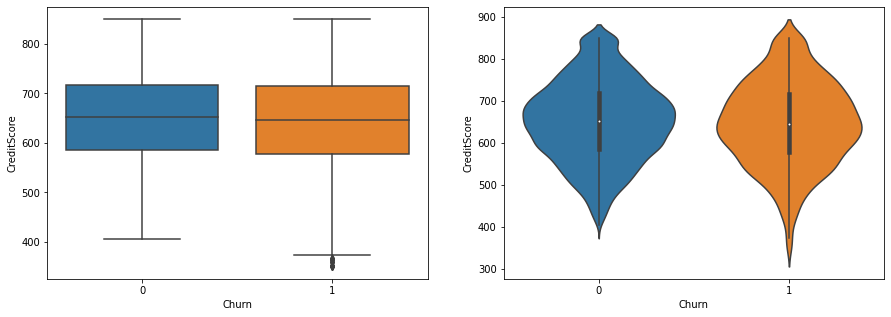

In [ ]:
#credit score distribution
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x="Churn", y="CreditScore", data=df, ax=ax[0])
sns.violinplot(x="Churn", y="CreditScore", data=df, ax=ax[1])

<AxesSubplot:xlabel='Tenure', ylabel='count'>

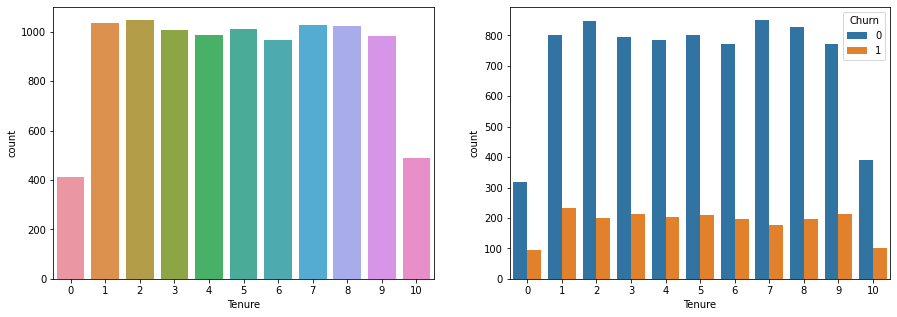

In [16]:
#Tenure 
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df,ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=df,ax=ax[1])

<AxesSubplot:xlabel='Balance', ylabel='Count'>

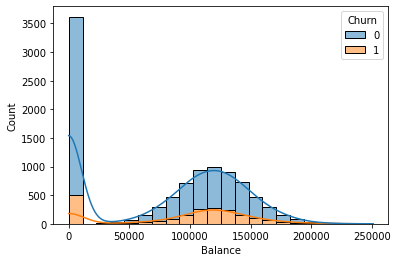

In [17]:
#Bank Balanace
sns.histplot(data=df, x="Balance", hue="Churn", multiple="stack",kde=True) 

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

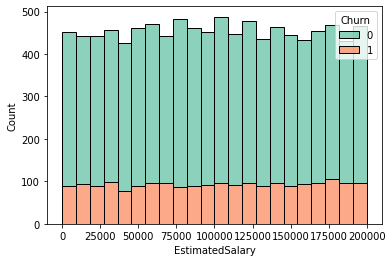

In [18]:
# Estimated SaLary
sns.histplot(data=df, x="EstimatedSalary", hue="Churn", multiple="stack",palette="Set2")

# Data Science Techniques

In [21]:
#Lael encoding
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]


In [22]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']]=scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


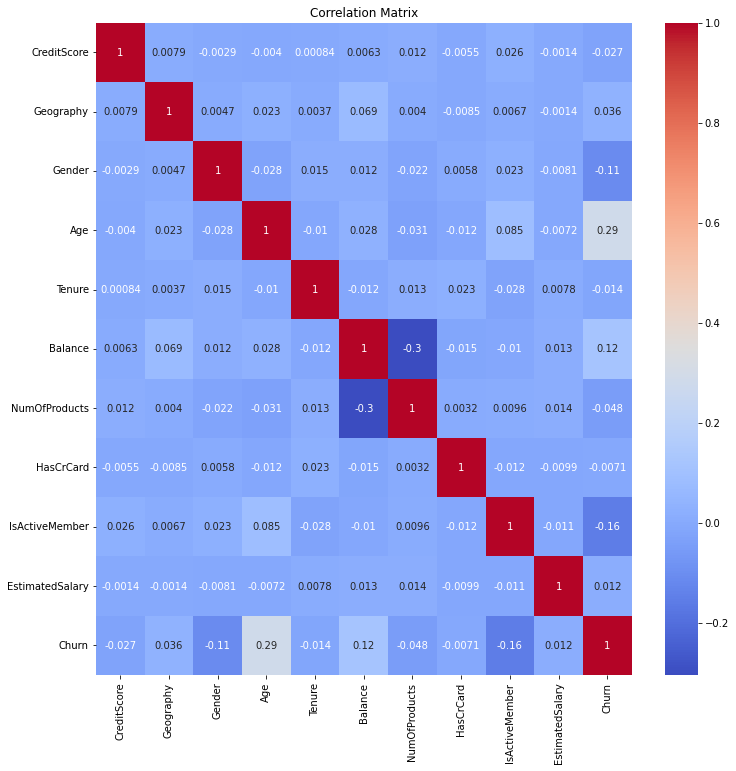

In [24]:
#correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# AI Models - Machine Learning

In [25]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),df['Churn'],test_size=0.25,random_state=42)

### Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#creating Decision Tree Classifer object
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [28]:
#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

In [29]:
#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [30]:
#Fitting the grid search object to the training data
grid_dtree.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [0, 42]},
             scoring='roc_auc', verbose=1)

In [31]:
#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 8, 'random_state': 42}


In [32]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=10)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [33]:
#training the model
dtree.fit(X_train,y_train)
#training accuracy
dtree.score(X_train,y_train)

0.8588

In [34]:
dtree_pred = dtree.predict(X_test)

In [35]:
from sklearn.metrics import  accuracy_score
acc_score = accuracy_score(y_test, dtree_pred)
acc_score*100

85.96000000000001

### Random Forest Classifier 

In [36]:
from sklearn.ensemble import RandomForestClassifier
#creating Random Forest Classifer object
rfc = RandomForestClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_rfc.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_rfc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'random_state': 0}


In [37]:
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=0, criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=0)

In [38]:
#training the model
rfc.fit(X_train, y_train)
#model accuracy
rfc.score(X_train, y_train)

0.8788

In [39]:
rfc_pred = rfc.predict(X_test)

In [40]:
accuracy_sc = accuracy_score(y_test, rfc_pred)
accuracy_sc*100

86.6

### Model Evaluation

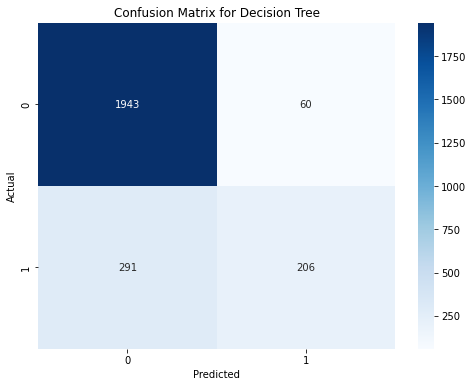

In [41]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

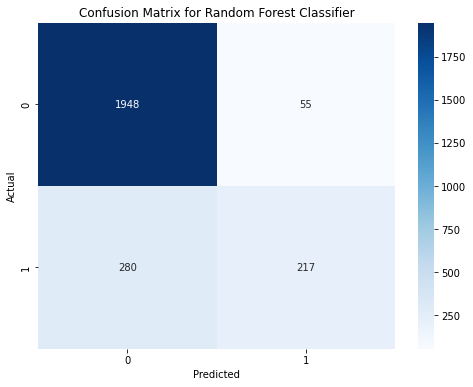

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

`Random Forest Classifier` was a better model bwteen the two models.